### Entity Embedding
Entity embedding is a technique used in machine learning to represent categorical variables as continuous vectors, or embeddings. These embeddings can then be used as input to neural networks, allowing the model to better handle categorical variables and make more accurate predictions. Entity embeddings are typically learned by training a neural network on a large dataset of examples, where the categorical variable is one of the input features. The embeddings are learned as part of the model's parameters, and can be used for a variety of tasks, such as natural language processing and recommendation systems. Entity embedding allows models to understand the relationships and similarities between categorical variables, which can be useful for tasks such as product recommendations, where it is important to understand the similarities between different products.

reference: https://grabngoinfo.com/categorical-entity-embedding-using-python-tensorflow-keras/

In [156]:
# Import portion of a package
import matplotlib.pyplot as plt  # Most common visualization package that a lot of others are based on

# Import full packages under custom name
import numpy as np  # Common package for numerical methods
import pandas as pd  # Common package for data storeage/manipulation
import seaborn as sns  # Common package for statistical visualizations

# Import portion of a package
import scipy.stats as stats
from sklearn.impute import SimpleImputer as Imputer  # Specific function from common machine learning package

import glob
import os
from pathlib import Path

## Get weekly sales data

In [157]:
sales_path = "clean_data\cleaned_sales.csv"
df_sales_data = pd.read_csv(sales_path, index_col=0, header=0)
df_sales_data

,yr_num,wk_num,product_num,store_num,sales_qty
0,2021,36,5010,241,3
1,2021,36,5044,181,1
2,2021,36,5044,233,4
3,2021,36,5044,241,1
4,2021,36,5044,466,1
...,...,...,...,...,...
223378088,2022,9,8997134,353,3
223378089,2022,9,8997134,448,1
223378090,2022,9,8997134,450,5
223378091,2022,9,8997134,486,4


## Create sales quantity for each store given week and year

In [158]:
# drop unnesssary column
df_sale_copy = df_sales_data.copy()
df_sale_copy = df_sales_data.drop(['product_num'], axis=1)

In [159]:
df_sale_clean = df_sale_copy.groupby(['yr_num','wk_num','store_num']).sum()

In [160]:
# here we groupby and get sales quantity for each store per week per year
df_sale_clean

sales_qty
yr_num wk_num store_num           
2021   36     1              22847
              2              11767
              3              10662
              4              14281
              5              21254
...                            ...
2022   35     928            19375
              929            20168
              930            11205
              932            20087
              935             1486

[26312 rows x 1 columns]

In [161]:
df_sale_clean = df_sale_clean.reset_index()
df_sale_clean

,yr_num,wk_num,store_num,sales_qty
0,2021,36,1,22847
1,2021,36,2,11767
2,2021,36,3,10662
3,2021,36,4,14281
4,2021,36,5,21254
...,...,...,...,...
26307,2022,35,928,19375
26308,2022,35,929,20168
26309,2022,35,930,11205
26310,2022,35,932,20087


## Merge store data and weekly sale data

In [162]:
path_store = "clean_data/cleaned_store.csv" #Eric
# put it in data farme
df_store = pd.read_csv(path_store, index_col=0, header=0)
df_store

,store_num,store_nm,province_cd,latitude_qty,longitude_qty,store_size_cd,retail_square_ft_qty,ins_garden_centre_sqr_ft_qty,number_of_service_bays_qty,checkouts_count,store_concept_type_nm,onsite_propane_txt,winterized_canopy_txt,shopping_centre_nm
0,1,"ALLISTON, ON",ON,44.149236,-79.884000,C,47006,0,10,11,Smart,Yes,Not Determined,0
1,2,"Antigonish, NS",NS,45.617730,-61.984187,D,29461,0,6,7,Smart,Yes,No,Antigonish Market Square
2,3,"AMHERST, NS",NS,45.809747,-64.200389,D,31568,0,10,9,Smart,No,Yes,0
3,4,"Arnprior, ON",ON,45.425607,-76.366699,E,25371,3951,8,9,Smart,No,No,Arnprior Shopping Centre
4,5,"BANCROFT, ON",ON,45.084521,-77.860934,D,31466,0,10,7,Smart,Yes,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,928,"Place Versailles, QC",QC,45.592571,-73.541760,C,54121,0,7,9,Smart,No,No,Place Versailles
503,929,"Winnipeg Grant Park, MB",MB,49.858253,-97.164098,B,55557,0,7,9,Smart2,No,No,0
504,930,"Calgary Mount Royal, AB",AB,51.038404,-114.082194,E,24475,0,0,6,Smart,No,No,0
505,932,"NORTH SAANICH, BC",BC,48.662738,-123.419055,D,31596,0,7,9,Smart,No,No,0


In [163]:
# merge sales and store data on key "store_num"
merged_data = pd.merge(df_sale_clean, df_store, on='store_num', how='left')

In [164]:
merged_data

,yr_num,wk_num,store_num,sales_qty,store_nm,province_cd,latitude_qty,longitude_qty,store_size_cd,retail_square_ft_qty,ins_garden_centre_sqr_ft_qty,number_of_service_bays_qty,checkouts_count,store_concept_type_nm,onsite_propane_txt,winterized_canopy_txt,shopping_centre_nm
0,2021,36,1,22847,"ALLISTON, ON",ON,44.149236,-79.884000,C,47006,0,10,11,Smart,Yes,Not Determined,0
1,2021,36,2,11767,"Antigonish, NS",NS,45.617730,-61.984187,D,29461,0,6,7,Smart,Yes,No,Antigonish Market Square
2,2021,36,3,10662,"AMHERST, NS",NS,45.809747,-64.200389,D,31568,0,10,9,Smart,No,Yes,0
3,2021,36,4,14281,"Arnprior, ON",ON,45.425607,-76.366699,E,25371,3951,8,9,Smart,No,No,Arnprior Shopping Centre
4,2021,36,5,21254,"BANCROFT, ON",ON,45.084521,-77.860934,D,31466,0,10,7,Smart,Yes,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26307,2022,35,928,19375,"Place Versailles, QC",QC,45.592571,-73.541760,C,54121,0,7,9,Smart,No,No,Place Versailles
26308,2022,35,929,20168,"Winnipeg Grant Park, MB",MB,49.858253,-97.164098,B,55557,0,7,9,Smart2,No,No,0
26309,2022,35,930,11205,"Calgary Mount Royal, AB",AB,51.038404,-114.082194,E,24475,0,0,6,Smart,No,No,0
26310,2022,35,932,20087,"NORTH SAANICH, BC",BC,48.662738,-123.419055,D,31596,0,7,9,Smart,No,No,0


## Turn binary data into numerical data

Onsite propane include yes and no, turn to 0 and 1
winterized canopy inlude yes, no, and not determined, turn to 0,1,2

In [165]:
merged_data['onsite_propane_txt'] = merged_data['onsite_propane_txt'].map({'Yes': 0, 'No': 1})
merged_data['winterized_canopy_txt'] = merged_data['winterized_canopy_txt'].map({'Yes': 0, 'No': 1, 'Not Determined': 2})

In [166]:
merged_data['winterized_canopy_txt']

0        2
1        1
2        0
3        1
4        0
        ..
26307    1
26308    1
26309    1
26310    1
26311    2
Name: winterized_canopy_txt, Length: 26312, dtype: int64

Scale numerical data, so the model data will scale between 0 and 1, which make model less sensitive to large numbers

In [167]:
from sklearn.preprocessing import MinMaxScaler

# select the numerical columns from the store data
numerical_cols = ['latitude_qty', 'longitude_qty','retail_square_ft_qty','ins_garden_centre_sqr_ft_qty','number_of_service_bays_qty','checkouts_count']
store_data_numerical = merged_data[numerical_cols]

# initialize the scaler
scaler = MinMaxScaler(feature_range=(0, 1))

# fit the scaler to the numerical columns
scaler.fit(store_data_numerical)

# transform the numerical columns
store_data_numerical = scaler.transform(store_data_numerical)

In [168]:
# create a new DataFrame with the preprocessed numerical columns
store_data_numerical = pd.DataFrame(store_data_numerical, columns=numerical_cols)

merged_data.drop(columns=numerical_cols, inplace=True)
store_data = pd.concat([merged_data, store_data_numerical], axis=1)
store_data = store_data.dropna()

In [169]:
store_data = store_data.dropna()

In [170]:
store_data

,yr_num,wk_num,store_num,sales_qty,store_nm,province_cd,store_size_cd,store_concept_type_nm,onsite_propane_txt,winterized_canopy_txt,shopping_centre_nm,latitude_qty,longitude_qty,retail_square_ft_qty,ins_garden_centre_sqr_ft_qty,number_of_service_bays_qty,checkouts_count
0,2021,36,1,22847,"ALLISTON, ON",ON,C,Smart,0,2,0,0.103409,0.670209,0.340928,0.000000,0.333333,0.310345
1,2021,36,2,11767,"Antigonish, NS",NS,D,Smart,0,1,Antigonish Market Square,0.175337,0.887588,0.208036,0.000000,0.200000,0.172414
2,2021,36,3,10662,"AMHERST, NS",NS,D,Smart,1,0,0,0.184742,0.860674,0.223995,0.000000,0.333333,0.241379
3,2021,36,4,14281,"Arnprior, ON",ON,E,Smart,1,1,Arnprior Shopping Centre,0.165927,0.712924,0.177057,0.269638,0.266667,0.241379
4,2021,36,5,21254,"BANCROFT, ON",ON,D,Smart,0,0,0,0.149220,0.694778,0.223223,0.000000,0.333333,0.172414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26307,2022,35,928,19375,"Place Versailles, QC",QC,C,Smart,1,1,Place Versailles,0.174105,0.747230,0.394819,0.000000,0.233333,0.241379
26308,2022,35,929,20168,"Winnipeg Grant Park, MB",MB,B,Smart2,1,1,0,0.383042,0.460356,0.405696,0.000000,0.233333,0.241379
26309,2022,35,930,11205,"Calgary Mount Royal, AB",AB,E,Smart,1,1,0,0.440847,0.254900,0.170271,0.000000,0.000000,0.137931
26310,2022,35,932,20087,"NORTH SAANICH, BC",BC,D,Smart,1,1,0,0.324485,0.141511,0.224208,0.000000,0.233333,0.241379


Convert categorical data into label data, so each unique value inside a categorical data will be replaced by int value

In [171]:
from sklearn.preprocessing import LabelEncoder


# Create a sample DataFrame
categorical_cols = ['store_nm', 'province_cd','store_size_cd','store_concept_type_nm','shopping_centre_nm']
# Create a label encoder
le = LabelEncoder()
mappings = []
# Fit and transform the column 'A'
for i in categorical_cols:
    original = store_data[i]
    store_data[i] = le.fit_transform(store_data[i])
    mappings.append(dict (zip(original, store_data[i])))



In [172]:
#save encodings if we want to reference them later
store_nm_encoding = mappings[0]
province_cd_encoding = mappings[1]
store_size_cd_encoding = mappings[2]
store_concept_type_nm_encoding = mappings[3]
shopping_centre_nm_encoding = mappings[4]

In [173]:
numerical_cols = ['latitude_qty', 'longitude_qty','retail_square_ft_qty','ins_garden_centre_sqr_ft_qty','number_of_service_bays_qty','checkouts_count','wk_num','onsite_propane_txt','winterized_canopy_txt']

In [174]:
from sklearn.model_selection import train_test_split
# Features
X = store_data.iloc[:, 1:].copy().drop('sales_qty', axis=1)

# Target
y = store_data['sales_qty']

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# Check the number of records in training and testing dataset.
print(f'The training dataset has {X_train.shape[0]} records and {X_train.shape[1]} columns.')
print(f'The testing dataset has {len(X_test)} records.')

The training dataset has 21049 records and 15 columns.
The testing dataset has 5263 records.


In [175]:
# Input list for the training data
input_list_train = []

# Input list for the testing data
input_list_test = []

In [176]:
from keras.layers import Input, Embedding, Dense

# Input dimension of the numeric variables
input_numeric = Input(shape=(len(numerical_cols),))

# Output dimension of the numeric variables
emb_numeric = input_numeric

# Take a look at the output dimension
emb_numeric

<KerasTensor: shape=(None, 9) dtype=float32 (created by layer 'input_19')>

# Data Preview

This is the dataframe, where we will use store_nm,province_cd, store_size_cd, store_concept_type_nm, shopping_centre_nm, 'latitude_qty', 'longitude_qty','retail_square_ft_qty','ins_garden_centre_sqr_ft_qty','number_of_service_bays_qty','checkouts_count','wk_num','onsite_propane_txt','winterized_canopy_txt' as inputs, and used to predict the weekly sales of each store per month. 

Note the the sales_qty is obtained by sum of all products purchased in that store at that time

In [177]:
store_data.head()

,yr_num,wk_num,store_num,sales_qty,store_nm,province_cd,store_size_cd,store_concept_type_nm,onsite_propane_txt,winterized_canopy_txt,shopping_centre_nm,latitude_qty,longitude_qty,retail_square_ft_qty,ins_garden_centre_sqr_ft_qty,number_of_service_bays_qty,checkouts_count
0,2021,36,1,22847,2,7,2,5,0,2,0,0.103409,0.670209,0.340928,0.000000,0.333333,0.310345
1,2021,36,2,11767,14,5,3,5,0,1,2,0.175337,0.887588,0.208036,0.000000,0.200000,0.172414
2,2021,36,3,10662,3,5,3,5,1,0,0,0.184742,0.860674,0.223995,0.000000,0.333333,0.241379
3,2021,36,4,14281,15,7,4,5,1,1,3,0.165927,0.712924,0.177057,0.269638,0.266667,0.241379
4,2021,36,5,21254,19,7,3,5,0,0,0,0.149220,0.694778,0.223223,0.000000,0.333333,0.172414


The input data contains selected categorical and numerical data for the store information which include store_nm,province_cd, store_size_cd, store_concept_type_nm, shopping_centre_nm, 'latitude_qty', 'longitude_qty','retail_square_ft_qty','ins_garden_centre_sqr_ft_qty', 'number_of_service_bays_qty', 'checkouts_count', 'wk_num','onsite_propane_txt', 'winterized_canopy_txt'.

- All categoriacal data is transformed by labeled encoder, unique number represent unique value in that category, we will generate vector representations for each unique value and use as entity embedding
- All numerical embedding is scaled into 0 and 1 to prevent different scale

In [178]:
inputs = [store_data['store_nm'].to_numpy(), 
store_data['province_cd'].to_numpy(),store_data['store_size_cd'].to_numpy(),store_data['store_concept_type_nm'].to_numpy(), store_data['shopping_centre_nm'].to_numpy(),
store_data[numerical_cols].values
]
print(inputs[0])
print('length: '+str(len(inputs[0])))

[  2  14   3 ...  79 288 460]
length: 26312


Each categorical column data is one inputs, and all numerical data is one input, will be put into neural network to train get vector representation of category

## Create NN and create embedding layer for each categorical data, adding dense vector to learn additional relationship regarding to predicting weekly sale
the model will contain embedding layer for each type of categorical column. and then the neural network will try to predict the weekly sale, which the embedding will adjust weight based on mean square error on predicting weekly sale

In [179]:
from math import sqrt
from keras.layers import Input, Embedding, Dense
from keras.models import Model
import tensorflow as tf



input_layers = []
output_layers = []


for i in categorical_cols:
    n_unique_day = store_data[i].nunique()
    n_dim_day = int(sqrt(n_unique_day))
    input_week = Input(shape=(1, ))
    input_layers.append(input_week)
    output_week = Embedding(input_dim=n_unique_day, 
                        output_dim=n_dim_day, name=str(i))(input_week)
    output_week = tf.keras.layers.Reshape(target_shape=(n_dim_day, ))(output_week)
    output_layers.append(output_week)

# Input data dimensions
input_layers.append(input_numeric)

# Take a look at the data
input_layers


[<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'input_20')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'input_21')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'input_22')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'input_23')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'input_24')>,
 <KerasTensor: shape=(None, 9) dtype=float32 (created by layer 'input_19')>]

In [180]:
output_week

<KerasTensor: shape=(None, 9) dtype=float32 (created by layer 'reshape_19')>

In [181]:
# Embedding dimensions
emb_numeric = input_numeric

output_layers.append(emb_numeric)

# Take a look at the data
output_layers

[<KerasTensor: shape=(None, 22) dtype=float32 (created by layer 'reshape_15')>,
 <KerasTensor: shape=(None, 3) dtype=float32 (created by layer 'reshape_16')>,
 <KerasTensor: shape=(None, 2) dtype=float32 (created by layer 'reshape_17')>,
 <KerasTensor: shape=(None, 2) dtype=float32 (created by layer 'reshape_18')>,
 <KerasTensor: shape=(None, 9) dtype=float32 (created by layer 'reshape_19')>,
 <KerasTensor: shape=(None, 9) dtype=float32 (created by layer 'input_19')>]

In [182]:
model = tf.keras.layers.Concatenate()(output_layers)
# Add a few hidden layers
model = Dense(200, kernel_initializer="uniform")(model)
model = tf.keras.layers.Activation('relu')(model)
model = Dense(100, kernel_initializer="uniform")(model)
model = tf.keras.layers.Activation('relu')(model)
# And finally our output layer
model = Dense(1)(model)
model = tf.keras.layers.Activation('sigmoid')(model)
# Put it all together and compile the model
model = Model(inputs=input_layers, outputs=model)
model.summary()
opt = tf.keras.optimizers.experimental.SGD(lr=0.05)
model.compile(loss='mse', optimizer=opt, metrics=['mse'])

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_20 (InputLayer)          [(None, 1)]          0           []                               
                                                                                                  
 input_21 (InputLayer)          [(None, 1)]          0           []                               
                                                                                                  
 input_22 (InputLayer)          [(None, 1)]          0           []                               
                                                                                                  
 input_23 (InputLayer)          [(None, 1)]          0           []                               
                                                                                            

Train the data

In [183]:
input_layers
categorical_cols

['store_nm',
 'province_cd',
 'store_size_cd',
 'store_concept_type_nm',
 'shopping_centre_nm']

In [184]:
inputs = [store_data['store_nm'].to_numpy(), 
store_data['province_cd'].to_numpy(),store_data['store_size_cd'].to_numpy(),store_data['store_concept_type_nm'].to_numpy(), store_data['shopping_centre_nm'].to_numpy(),store_data[numerical_cols].values
]
model.fit(inputs, y = store_data['sales_qty'].to_numpy(), epochs=10)


Epoch 1/10
823/823 [==============================] - 2s 1ms/step - loss: 680163328.0000 - mse: 680163328.0000
Epoch 2/10
823/823 [==============================] - 1s 1ms/step - loss: 680163648.0000 - mse: 680163648.0000
Epoch 3/10
823/823 [==============================] - 1s 1ms/step - loss: 680163328.0000 - mse: 680163328.0000
Epoch 4/10
823/823 [==============================] - 1s 1ms/step - loss: 680163200.0000 - mse: 680163200.0000
Epoch 5/10
823/823 [==============================] - 1s 1ms/step - loss: 680162880.0000 - mse: 680162880.0000
Epoch 6/10
823/823 [==============================] - 1s 1ms/step - loss: 680163328.0000 - mse: 680163328.0000
Epoch 7/10
823/823 [==============================] - 1s 1ms/step - loss: 680162944.0000 - mse: 680162944.0000
Epoch 8/10
823/823 [==============================] - 1s 1ms/step - loss: 680163072.0000 - mse: 680163072.0000
Epoch 9/10
823/823 [==============================] - 1s 1ms/step - loss: 680163392.0000 - mse: 680163392.0000
E

Retrieve the empedding layer, each value in the embedding layer represent the numberical value for the specific value of that category

In [185]:
print(len(model.layers[5].get_weights()[0]))
print(len(model.layers[6].get_weights()[0]))
print(len(model.layers[7].get_weights()[0]))
print(len(model.layers[8].get_weights()[0]))
print(len(model.layers[9].get_weights()[0]))

506
12
6
8
93


## Save each embedding into excel, each row represent the vector representation of that unique value in that categorical data

In [186]:
try:
    os.mkdir("embeddings/entity_cat_emb/")
except:
    None

In [187]:
number = 5
for i in categorical_cols:

    # Get weights from the embedding layer
    cat_emb_df = pd.DataFrame(model.layers[number].get_weights()[0]).reset_index()
    # Add prefix to the embedding names
    #cat_emb_df = cat_emb_df.add_prefix('cat_')
    
    # add category name in front for each cat_X column
    cat_emb_df = cat_emb_df.rename(columns={c: i + "_cat_" + str(c) for c in cat_emb_df.columns if c not in [i, 'index']})

    cat_encoder = {}
    unique_cat = np.unique(store_data[i])

    # Encode the categorical variable
    for j in range(len(unique_cat)):
        cat_encoder[unique_cat[j]] = j
    # Put the categorical encoder dictionary into a dataframe
    cat_encoder_df = pd.DataFrame(cat_encoder.items(), columns=[str(i), 'index'])

    # Merge data to append the category name
    cat_emb_df = pd.merge(cat_encoder_df, cat_emb_df, how = 'inner', on='index')
    cat_emb_df = cat_emb_df.drop(columns=["index"])

    # Take a look at the data
    cat_emb_df.head()
    # Save embedding results
    cat_emb_df.to_csv('embeddings/entity_cat_emb/'+str(i)+'_cat_embedding.csv', index = False)
    number+=1



## Map the categorical embeddings to their value in the original dataframe to complete the embedding for each store

Circling back to the store_data dataframe, each categorical column has a vector representation for each of its unique values. We must map each unique value to its corresponding vector. For example, province_cd = 7 in the first row which was originally ON (Ontario). Now, we must map this value (7) to the corresponiding vector in province_cd_cat_embedding.csv: [0.017288119,0.56338453,-0.3758884]. Since it has 3 values, we will add 3 columns: province_cd_cat_0, province_cd_cat_1, province_cd_cat_2 to hold these values, and then remove the original province_cd column.

In [188]:
store_data.head()

,yr_num,wk_num,store_num,sales_qty,store_nm,province_cd,store_size_cd,store_concept_type_nm,onsite_propane_txt,winterized_canopy_txt,shopping_centre_nm,latitude_qty,longitude_qty,retail_square_ft_qty,ins_garden_centre_sqr_ft_qty,number_of_service_bays_qty,checkouts_count
0,2021,36,1,22847,2,7,2,5,0,2,0,0.103409,0.670209,0.340928,0.000000,0.333333,0.310345
1,2021,36,2,11767,14,5,3,5,0,1,2,0.175337,0.887588,0.208036,0.000000,0.200000,0.172414
2,2021,36,3,10662,3,5,3,5,1,0,0,0.184742,0.860674,0.223995,0.000000,0.333333,0.241379
3,2021,36,4,14281,15,7,4,5,1,1,3,0.165927,0.712924,0.177057,0.269638,0.266667,0.241379
4,2021,36,5,21254,19,7,3,5,0,0,0,0.149220,0.694778,0.223223,0.000000,0.333333,0.172414


In [189]:
store_nm_cat_embedding = pd.read_csv('embeddings\entity_cat_emb\store_nm_cat_embedding.csv', header=0)
province_cat_embedding = pd.read_csv('embeddings\entity_cat_emb\province_cd_cat_embedding.csv', header=0)
store_size_cat_embedding = pd.read_csv('embeddings\entity_cat_emb\store_size_cd_cat_embedding.csv', header=0)
store_concept_nm_cat_embedding = pd.read_csv('embeddings\entity_cat_emb\store_concept_type_nm_cat_embedding.csv', header=0)
shopping_centre_cat_embedding = pd.read_csv('embeddings\entity_cat_emb\shopping_centre_nm_cat_embedding.csv', header=0)

Merge each categorical embedding above with store_data, to replace the respective categorical columns witht the vector that corresponds to each unique value

In [190]:
store_sales_embedding = store_data.merge(store_nm_cat_embedding, on='store_nm', how='inner').drop(['store_nm'], axis=1)
store_sales_embedding = store_sales_embedding.merge(province_cat_embedding, on='province_cd', how='inner').drop(['province_cd'], axis=1)
store_sales_embedding = store_sales_embedding.merge(store_size_cat_embedding, on='store_size_cd', how='inner').drop(['store_size_cd'], axis=1)
store_sales_embedding = store_sales_embedding.merge(store_concept_nm_cat_embedding, on='store_concept_type_nm', how='inner').drop(['store_concept_type_nm'], axis=1)
store_sales_embedding = store_sales_embedding.merge(shopping_centre_cat_embedding, on='shopping_centre_nm', how='inner').drop(['shopping_centre_nm'], axis=1)


# Store Sales Embeddings

Now, each embedding contains sales data per week per store, combined with store characteristics: numerical values and a concatenation of vector representations for its categorical values. This can be used in a forecasting model to predict weekly sales quantities.

In [191]:
store_sales_embedding

,yr_num,wk_num,store_num,sales_qty,onsite_propane_txt,winterized_canopy_txt,latitude_qty,longitude_qty,retail_square_ft_qty,ins_garden_centre_sqr_ft_qty,...,store_concept_type_nm_cat_1,shopping_centre_nm_cat_0,shopping_centre_nm_cat_1,shopping_centre_nm_cat_2,shopping_centre_nm_cat_3,shopping_centre_nm_cat_4,shopping_centre_nm_cat_5,shopping_centre_nm_cat_6,shopping_centre_nm_cat_7,shopping_centre_nm_cat_8
0,2021,36,1,22847,0,2,0.103409,0.670209,0.340928,0.0,...,-0.329987,0.150506,0.232748,-0.08050,-0.108348,0.078646,-0.531273,-0.305400,0.077003,0.705012
1,2021,37,1,21874,0,2,0.103409,0.670209,0.340928,0.0,...,-0.329987,0.150506,0.232748,-0.08050,-0.108348,0.078646,-0.531273,-0.305400,0.077003,0.705012
2,2021,38,1,20441,0,2,0.103409,0.670209,0.340928,0.0,...,-0.329987,0.150506,0.232748,-0.08050,-0.108348,0.078646,-0.531273,-0.305400,0.077003,0.705012
3,2021,39,1,21213,0,2,0.103409,0.670209,0.340928,0.0,...,-0.329987,0.150506,0.232748,-0.08050,-0.108348,0.078646,-0.531273,-0.305400,0.077003,0.705012
4,2021,40,1,19903,0,2,0.103409,0.670209,0.340928,0.0,...,-0.329987,0.150506,0.232748,-0.08050,-0.108348,0.078646,-0.531273,-0.305400,0.077003,0.705012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26307,2022,31,247,12172,0,1,0.172889,0.746675,0.216020,0.0,...,0.036630,-0.025450,0.038856,0.00996,-0.017686,0.043561,0.034025,0.015156,-0.049212,-0.045765
26308,2022,32,247,9473,0,1,0.172889,0.746675,0.216020,0.0,...,0.036630,-0.025450,0.038856,0.00996,-0.017686,0.043561,0.034025,0.015156,-0.049212,-0.045765
26309,2022,33,247,9519,0,1,0.172889,0.746675,0.216020,0.0,...,0.036630,-0.025450,0.038856,0.00996,-0.017686,0.043561,0.034025,0.015156,-0.049212,-0.045765
26310,2022,34,247,9491,0,1,0.172889,0.746675,0.216020,0.0,...,0.036630,-0.025450,0.038856,0.00996,-0.017686,0.043561,0.034025,0.015156,-0.049212,-0.045765


In [192]:
try:
    os.mkdir("embeddings/store_embeddings/")
except:
    None

In [193]:
store_sales_embedding.to_csv('embeddings/store_embeddings/store_sales_embedding.csv', index = False)

# Store Embeddings

To obtain embeddings with store information alone (excluding sales data), we can extract it from the dataframe above.

In [194]:
store_embedding = store_sales_embedding.drop_duplicates(subset="store_num")
store_embedding = store_embedding.drop(columns=["yr_num","wk_num", "sales_qty"], axis=1)
store_embedding = store_embedding.sort_values(by="store_num")
store_embedding.reset_index(inplace=True, drop=True )
store_embedding

,store_num,onsite_propane_txt,winterized_canopy_txt,latitude_qty,longitude_qty,retail_square_ft_qty,ins_garden_centre_sqr_ft_qty,number_of_service_bays_qty,checkouts_count,store_nm_cat_0,...,store_concept_type_nm_cat_1,shopping_centre_nm_cat_0,shopping_centre_nm_cat_1,shopping_centre_nm_cat_2,shopping_centre_nm_cat_3,shopping_centre_nm_cat_4,shopping_centre_nm_cat_5,shopping_centre_nm_cat_6,shopping_centre_nm_cat_7,shopping_centre_nm_cat_8
0,1,0,2,0.103409,0.670209,0.340928,0.000000,0.333333,0.310345,0.013856,...,-0.329987,0.150506,0.232748,-0.080500,-0.108348,0.078646,-0.531273,-0.305400,0.077003,0.705012
1,2,0,1,0.175337,0.887588,0.208036,0.000000,0.200000,0.172414,0.016427,...,-0.329987,0.004048,-0.012023,0.027025,0.014794,-0.010191,0.011760,0.021765,-0.028034,0.038990
2,3,1,0,0.184742,0.860674,0.223995,0.000000,0.333333,0.241379,-0.018016,...,-0.329987,0.150506,0.232748,-0.080500,-0.108348,0.078646,-0.531273,-0.305400,0.077003,0.705012
3,4,1,1,0.165927,0.712924,0.177057,0.269638,0.266667,0.241379,-0.010468,...,-0.329987,-0.017304,0.045645,0.005278,0.044031,0.019924,0.019230,0.025633,-0.033046,0.007269
4,5,0,0,0.149220,0.694778,0.223223,0.000000,0.333333,0.172414,0.003104,...,-0.329987,0.150506,0.232748,-0.080500,-0.108348,0.078646,-0.531273,-0.305400,0.077003,0.705012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,928,1,1,0.174105,0.747230,0.394819,0.000000,0.233333,0.241379,0.013547,...,-0.329987,-0.009586,-0.027071,0.035260,-0.018693,-0.038133,-0.030149,-0.027707,0.033019,0.024916
502,929,1,1,0.383042,0.460356,0.405696,0.000000,0.233333,0.241379,-0.039248,...,-0.147667,0.150506,0.232748,-0.080500,-0.108348,0.078646,-0.531273,-0.305400,0.077003,0.705012
503,930,1,1,0.440847,0.254900,0.170271,0.000000,0.000000,0.137931,0.021668,...,-0.329987,0.150506,0.232748,-0.080500,-0.108348,0.078646,-0.531273,-0.305400,0.077003,0.705012
504,932,1,1,0.324485,0.141511,0.224208,0.000000,0.233333,0.241379,0.008470,...,-0.329987,0.150506,0.232748,-0.080500,-0.108348,0.078646,-0.531273,-0.305400,0.077003,0.705012


In [195]:
store_embedding.to_csv('embeddings/store_embeddings/store_embedding.csv', index = False)

# Evaluation of Store Sales Embeddings

These store embeddings cannot use the same evaluation model which predicted product type using the product embeddings. A forecasting model was created to predict sales using the store sales embeddings

To get an idea of how the sales data looks like, a scatter plot was created for the sales quantity per week for all stores. At any time of year, the sales quantity is likely within the range of [0 - 4000], but around week 20 and week 50 there are large spikes in sales. The highest observed sales quantities are over 100,000 during these times of year.

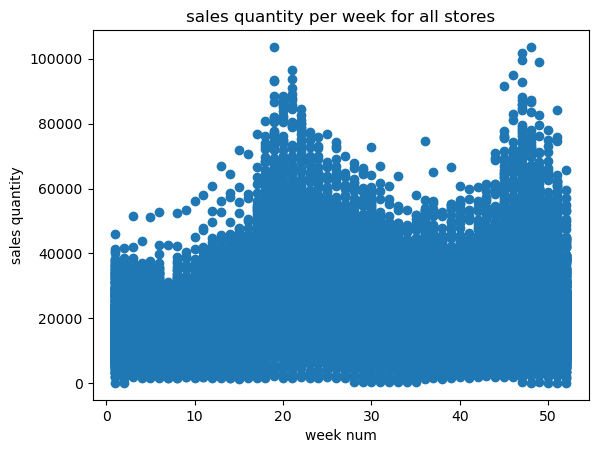

In [196]:
fig, ax = plt.subplots()
scatter = ax.scatter(x=store_sales_embedding["wk_num"], y=store_sales_embedding["sales_qty"])
ax.set_xlabel("week num")
ax.set_ylabel("sales quantity")
ax.set_title("sales quantity per week for all stores")
plt.show()

## Sales Forecasting Model

Sales quantity per week could depend on multiple factors such as the location (province), store type, store size, etc. Next, we will see whether the embedded characteristics of any given store can help predict the sales quantity at various times of the year.

In [197]:
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV

#shuffle the data
df = store_sales_embedding.sample(frac=1)

drop_for_X = ["sales_qty"]

X = df.drop(columns=drop_for_X)
Y = df[["sales_qty"]]

#obtain train test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

# Lasso CV applies cross validation automatically
linreg = LassoCV()
linreg.fit(X_train, y_train)

# Predict the sales
y_test_predictions = linreg.predict(X_test)

c:\Users\Avril Emond\anaconda3\envs\ctciter1\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1561: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [198]:
# Evaluate models
train_score = linreg.score(X_train, y_train)
test_score = linreg.score(X_test, y_test)
print(f'The train score is {train_score:.3f} and the test score is {test_score:.3f}')

The train score is 0.606 and the test score is 0.603


The forecasting model got an R^2 score of 0.606 on the train data and 0.603 on test data. The Store entity embeddings performed better than the one-hot encoded store embeddings, which got a R^2 score of 0.509 on test data.